## Tarea 09: Usa herramientas de IA para integrarlo al desarrollo de software.

Este cuaderno simula un sistema de monitoreo de temperatura usando Python, OpenCV y TensorFlow Lite. También incluye la conversión del modelo a TinyML para su posible implementación en microcontroladores como el ESP32.


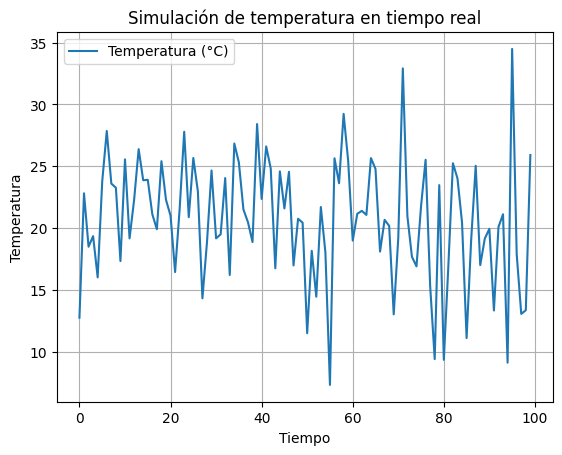

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simular 100 datos de temperatura (media = 20°C, desviación = 5°C)
temperatura = np.random.normal(loc=20, scale=5, size=100)

# Mostrar gráfica
plt.plot(temperatura, label="Temperatura (°C)")
plt.xlabel("Tiempo")
plt.ylabel("Temperatura")
plt.legend()
plt.title("Simulación de temperatura en tiempo real")
plt.grid()
plt.show()

In [2]:
for temp in temperatura:
    alerta = "⚠️ ALERTA: Temperatura Excesiva!" if temp > 25 else "✅ Temperatura Normal"
    print(f"Temperatura actual: {temp:.2f} °C - {alerta}")

Temperatura actual: 12.74 °C - ✅ Temperatura Normal
Temperatura actual: 22.80 °C - ✅ Temperatura Normal
Temperatura actual: 18.48 °C - ✅ Temperatura Normal
Temperatura actual: 19.34 °C - ✅ Temperatura Normal
Temperatura actual: 16.00 °C - ✅ Temperatura Normal
Temperatura actual: 23.77 °C - ✅ Temperatura Normal
Temperatura actual: 27.84 °C - ⚠️ ALERTA: Temperatura Excesiva!
Temperatura actual: 23.59 °C - ✅ Temperatura Normal
Temperatura actual: 23.25 °C - ✅ Temperatura Normal
Temperatura actual: 17.32 °C - ✅ Temperatura Normal
Temperatura actual: 25.55 °C - ⚠️ ALERTA: Temperatura Excesiva!
Temperatura actual: 19.16 °C - ✅ Temperatura Normal
Temperatura actual: 22.26 °C - ✅ Temperatura Normal
Temperatura actual: 26.37 °C - ⚠️ ALERTA: Temperatura Excesiva!
Temperatura actual: 23.86 °C - ✅ Temperatura Normal
Temperatura actual: 23.89 °C - ✅ Temperatura Normal
Temperatura actual: 21.10 °C - ✅ Temperatura Normal
Temperatura actual: 19.90 °C - ✅ Temperatura Normal
Temperatura actual: 25.40 °C

In [3]:
import cv2

for temp in temperatura:
    alerta = "ALERTA: Temperatura Excesiva!" if temp > 25 else "Temperatura Normal"
    color = (0, 0, 255) if temp > 25 else (0, 255, 0)

    frame = np.zeros((200, 600, 3), dtype=np.uint8)
    cv2.putText(frame, f"Temp: {temp:.2f}°C", (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    cv2.putText(frame, alerta, (30, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.imshow("Monitoreo", frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

In [5]:
import tensorflow as tf
import pandas as pd

# Datos de ejemplo para entrenar: convertir Celsius a Fahrenheit
df = pd.DataFrame({
    'Celsius': np.arange(0, 100, 10),
    'Fahrenheit': np.arange(32, 212, 18)
})

X_train = df['Celsius']
y_train = df['Fahrenheit']

# Crear y entrenar el modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

modelo.compile(optimizer='adam', loss='mean_squared_error')
modelo.fit(X_train, y_train, epochs=500, verbose=0)

# Probar predicción
print(f"Predicción a 30°C: {modelo.predict(np.array([[30]]))[0][0]:.2f} °F")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicción a 30°C: -21.27 °F


In [6]:
# Guardar modelo original
modelo.save("modelo_temperatura.h5")

# Convertir a TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
modelo_tflite = converter.convert()

# Guardar modelo TFLite
with open("modelo_temperatura.tflite", "wb") as f:
    f.write(modelo_tflite)

print("✅ Modelo convertido y guardado como .tflite")

INFO:tensorflow:Assets written to: C:\Users\juanito\AppData\Local\Temp\tmp8a0q5hld\assets


INFO:tensorflow:Assets written to: C:\Users\juanito\AppData\Local\Temp\tmp8a0q5hld\assets


Saved artifact at 'C:\Users\juanito\AppData\Local\Temp\tmp8a0q5hld'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2110363471696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2110363472464: TensorSpec(shape=(), dtype=tf.resource, name=None)
✅ Modelo convertido y guardado como .tflite
